# 2.3: Complex Machine Learning Models and Keras Part 2 - Random Forest for Stockholm

## Table of Contents

### 1. Import libraries and data (cleaned_DF and plweather)
### 2. Data Transformation/Wrangling
### 3. Data reshaping
### 4. Data splitting
### 5. Random Forest Model
### 6. Recognising the Important Features

## 1. Importing libraries and data (cleaned_DF and plweather)

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [193]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [195]:
# defining the path
path = r'C:/users/localadmin/Machine Learning 1'

In [197]:
# Importing cleaned data
X = pd.read_csv(os.path.join(path, 'Data Sets', 'Processed Data/cleaned_DF.csv'), index_col = False)

In [199]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [201]:
X.shape

(22950, 137)

In [203]:
#Import pleasant weather data as plweather
plweather = pd.read_csv(os.path.join(path, 'Data Sets','Original data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [205]:
plweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [207]:
plweather.shape

(22950, 16)

## 2. Data Transformation/Wrangling

create dataset for only Stockholm.

In [211]:
# Create a list of the columns containing "Basel" in their names

stockholm_list = list(x for x in X.columns if x.find('STOCKHOLM') >=0)
stockholm_list

['STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [213]:
# Create a dataframe with those columns

df_stockholm = X[stockholm_list]
df_stockholm

,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
0,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9
1,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0
2,5,0.69,1.0114,0.05,0.02,0.0,2.4,1.3,4.1
3,5,0.98,1.0114,0.05,0.00,0.0,1.2,0.4,2.3
4,5,0.96,1.0114,0.05,1.32,0.0,3.3,0.8,4.3
...,...,...,...,...,...,...,...,...,...
22945,5,0.98,1.0161,1.11,0.14,3.2,11.5,8.2,14.2
22946,5,1.00,1.0122,1.11,0.14,0.8,12.5,11.0,14.3
22947,5,0.85,1.0059,1.11,0.14,6.9,13.1,12.1,14.4
22948,5,0.94,1.0160,1.11,0.14,8.4,7.5,5.1,12.4


In [215]:
# Reduce answers dataset to Heathrow's answers only

plweather_stockholm = plweather['STOCKHOLM_pleasant_weather']
plweather_stockholm

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: STOCKHOLM_pleasant_weather, Length: 22950, dtype: int64

In [221]:
df_stockholm.shape # observations dataset has the correct shape

(22950, 9)

In [223]:
plweather_stockholm.shape # predictions dataset has the correct shape

(22950,)

## 3. Data Reshaping

In [226]:
X2 = df_stockholm

In [228]:
y2 = plweather_stockholm

In [230]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [232]:
X.shape

(22950, 9)

In [234]:
y.shape

(22950,)

## 4. Data Splitting

In [237]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [239]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [241]:
X_train

array([[  5.    ,   0.48  ,   1.0192, ...,   8.5   ,   5.    ,  11.9   ],
       [  5.    ,   0.88  ,   1.0076, ...,  -6.9   ,  -9.4   ,  -4.6   ],
       [  7.    ,   0.77  ,   1.0134, ...,  -8.3   , -13.3   ,  -5.5   ],
       ...,
       [  8.    ,   0.72  ,   1.0033, ...,   7.5   ,   5.4   ,  10.    ],
       [  8.    ,   0.78  ,   1.0121, ...,   8.6   ,   6.1   ,  13.2   ],
       [  6.    ,   0.48  ,   1.0148, ...,   1.    ,  -0.1   ,   4.    ]])

In [243]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [245]:
X_test

array([[ 5.    ,  0.85  ,  0.9971, ..., 14.8   , 12.6   , 17.5   ],
       [ 1.    ,  0.71  ,  1.0397, ..., -2.    , -4.2   ,  0.9   ],
       [ 8.    ,  0.87  ,  1.0048, ..., 18.3   , 15.9   , 22.6   ],
       ...,
       [ 8.    ,  0.89  ,  1.0214, ...,  9.1   ,  7.9   , 11.2   ],
       [ 6.    ,  0.75  ,  1.018 , ..., -0.4   , -5.    ,  3.    ],
       [ 8.    ,  0.54  ,  1.0124, ..., 11.9   ,  9.8   , 15.9   ]])

In [247]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5. Stockholm Random Forest

In [250]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [252]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


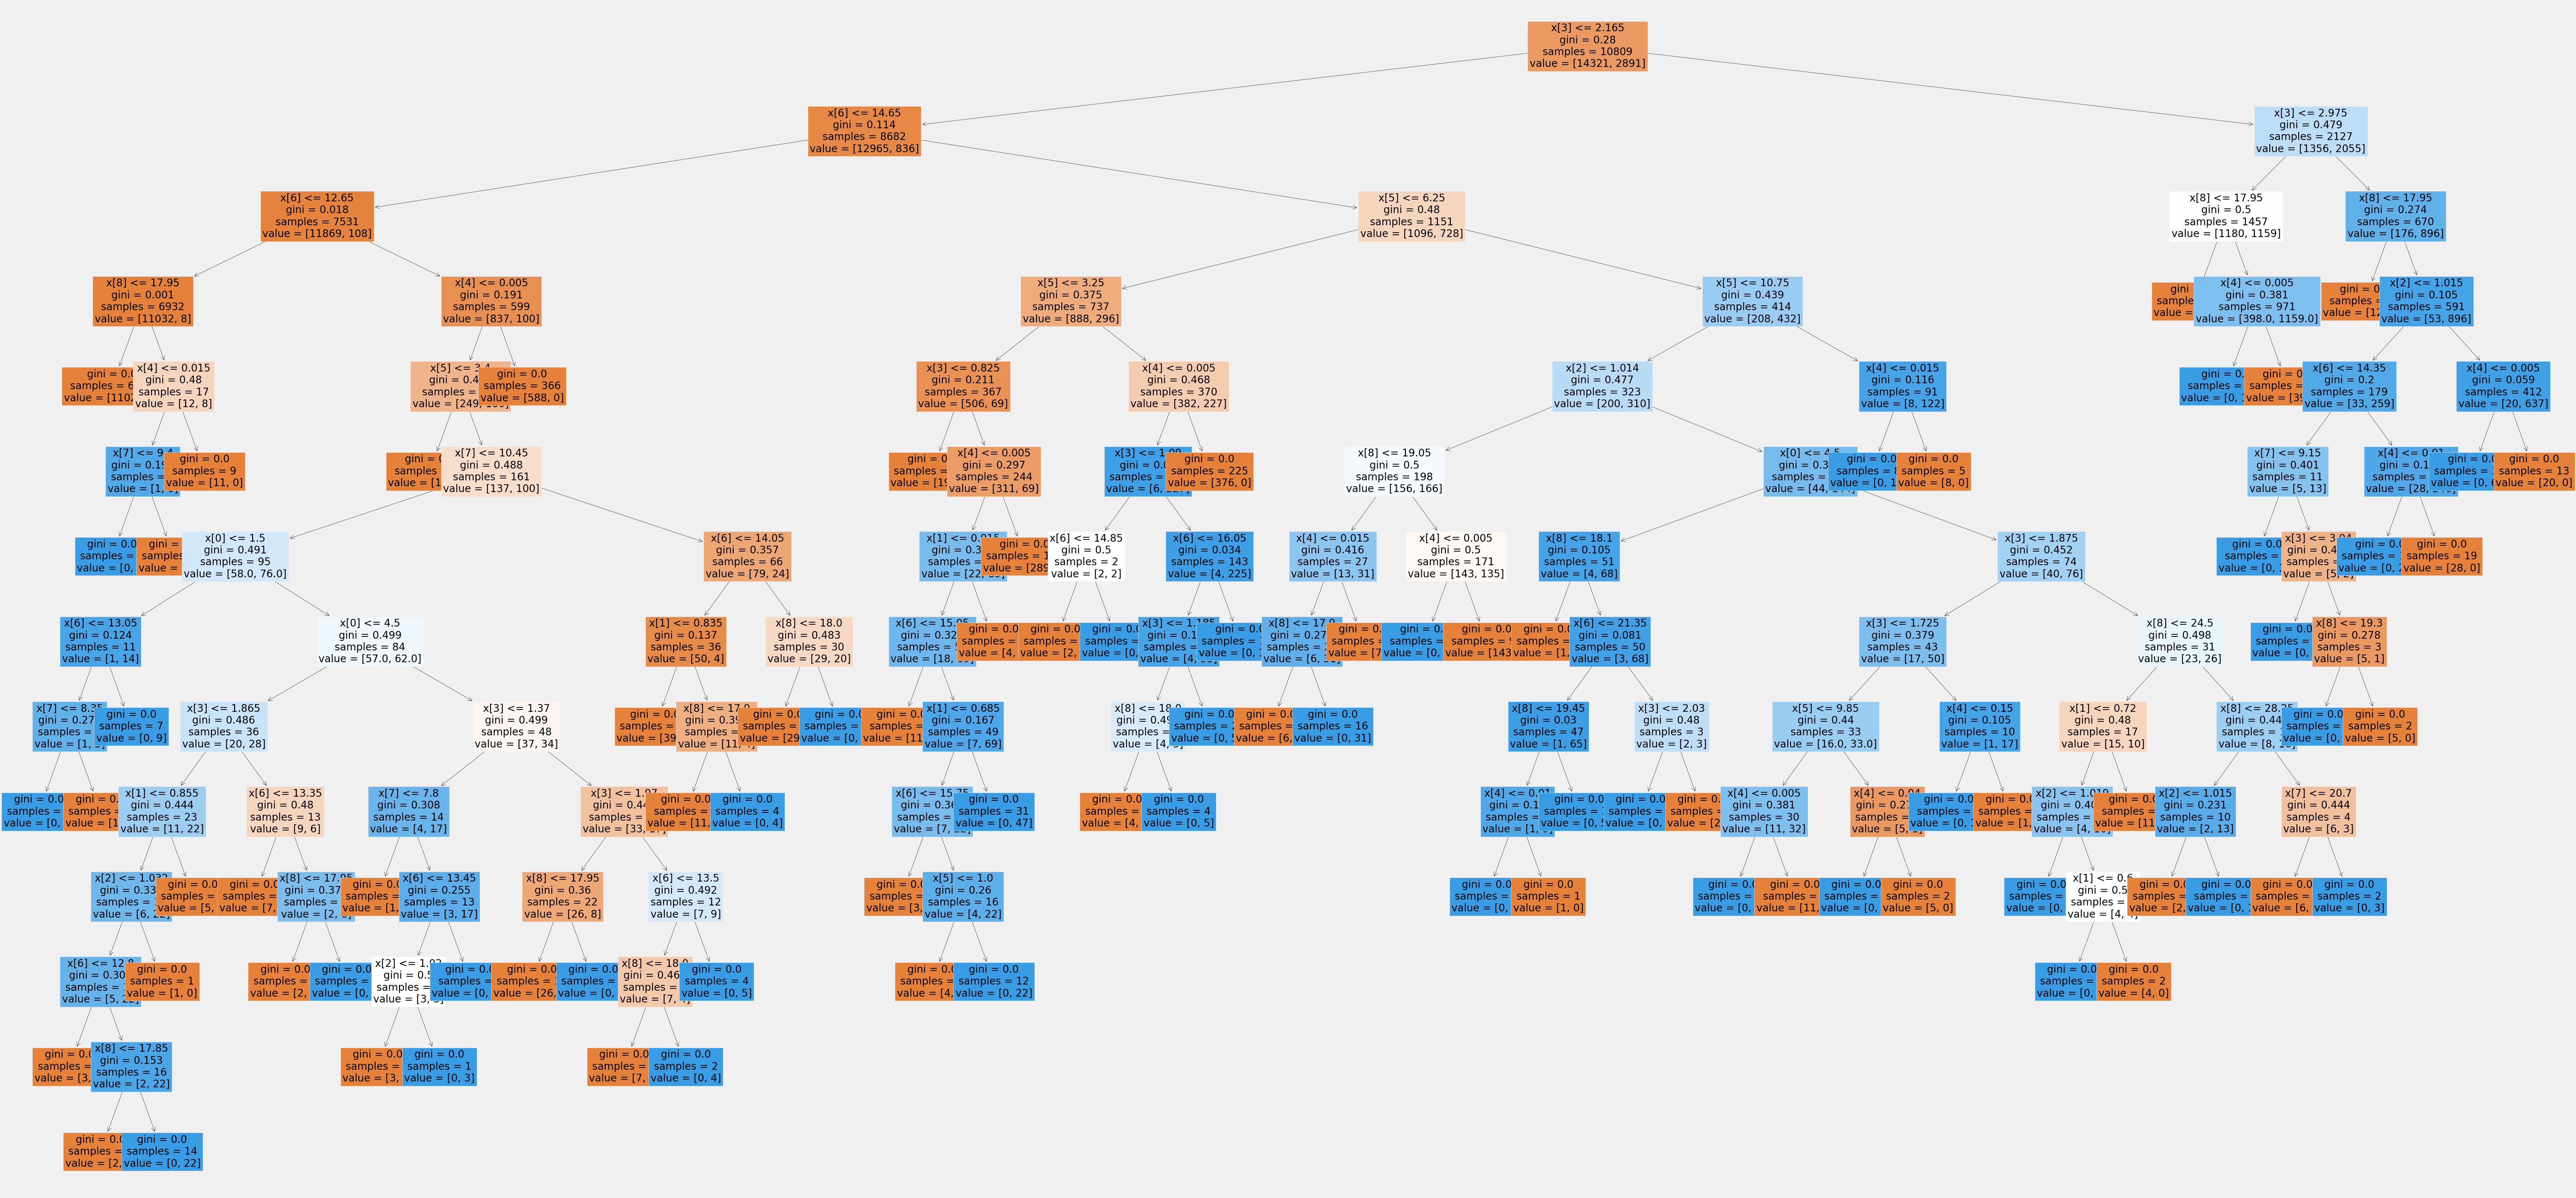

In [254]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [256]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_Stockholm.png'),bbox_inches='tight')

## 6. Recognising the important features

In [259]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01384632, 0.00218057, 0.0096549 , 0.07580437, 0.30953591,
       0.07006646, 0.16578799, 0.07292781, 0.28019566])

In [261]:
# Create a list of weather features

wx_list = [feature.replace('STOCKHOLM_', '') for feature in basel_list]
wx_list

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [263]:
important = pd.Series(newarray, index = wx_list)
important

BASEL_cloud_cover         0.013846
BASEL_humidity            0.002181
BASEL_pressure            0.009655
BASEL_global_radiation    0.075804
BASEL_precipitation       0.309536
BASEL_sunshine            0.070066
BASEL_temp_mean           0.165788
BASEL_temp_min            0.072928
BASEL_temp_max            0.280196
dtype: float64

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']


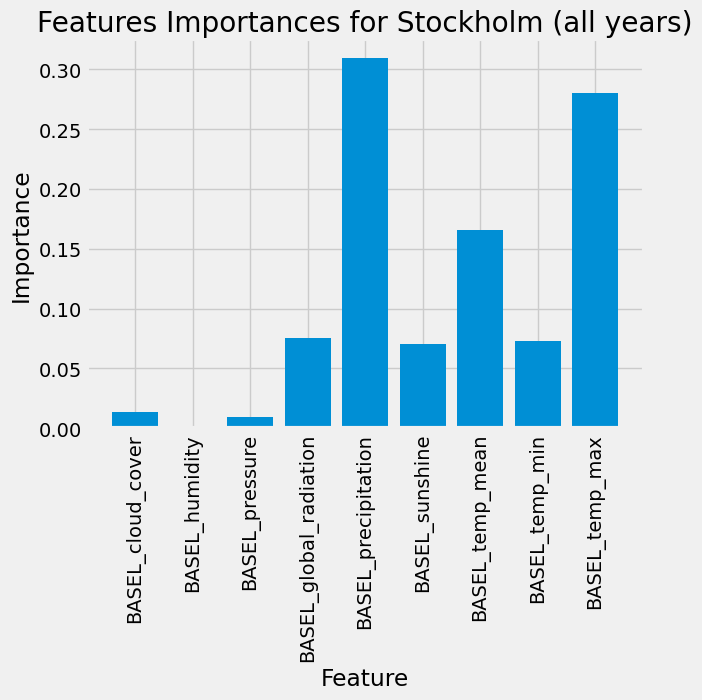

In [267]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Stockholm (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'Stockholm_feature_importances.png'), bbox_inches='tight')
plt.show()